In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import nltk
import re, pprint, string, os, math
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request
import heapq
from itertools import islice
from nltk import ngrams

## Task 1: (5 points) Text Summarization with Word Frequencies
#Date 6/13/2022

In [2]:
# 1.1 (0 points) Use the web scraping technique with BeautifulSoup as shown in class to
# get the text data from the specified data location on the Wikipedia webpage.
# Hints: Please see code snippets for web scraping in the lecture slides
# Text Data Location: https://en.wikipedia.org/wiki/Natural_language_processing
def scrape_webpage(url):
    ''' Use BeautifulSoup to scrape the webpage text contents'''
    scraped_textdata = urllib.request.urlopen(url)
    textdata = scraped_textdata.read()
    parsed_textdata = bs.BeautifulSoup(textdata, 'lxml')
    paragraphs = parsed_textdata.find_all('p')
    formated_text = ""
    
    for para in paragraphs:
        formated_text += para.text
    
    return formated_text

mytext = scrape_webpage('https://en.wikipedia.org/wiki/Natural_language_processing')


In [3]:
# 1.2 (0.5 points) Preprocess the text data and must include word tokenization, stop
# words and punctuation removal, etc.
print('Numer of characters in the scraped text: ', len(mytext))
#Tokenize sentences and words
tokens = word_tokenize(mytext)
type(tokens)
print("The number of sentences =", len(sent_tokenize(mytext)))
print("Number of words after word tokenizing: ", len(tokens))
print("First 20 words: \n", tokens[0:20], "\n")
#Remove punctuations
toker = nltk.RegexpTokenizer(r"\w+")
no_punct = toker.tokenize(mytext)
print("Number of words after punctuation remove: ", len(no_punct))
print(no_punct[0:20], "\n")

## Remove stop words and count the distinct cleaned words.
#USE FreqDist()
freq_dist = FreqDist(word.lower() for word in no_punct if word.lower() not in stopwords.words('english'))
print(freq_dist)

#OR 
filtered_words = [word.lower() for word in no_punct if word.lower() not in stopwords.words('english')]
print("Number of words without stop words: ", len(filtered_words))
print(filtered_words[0:20])



Numer of characters in the scraped text:  8945
The number of sentences = 50
Number of words after word tokenizing:  1519
First 20 words: 
 ['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with'] 

Number of words after punctuation remove:  1339
['Natural', 'language', 'processing', 'NLP', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers'] 

<FreqDist with 476 samples and 861 outcomes>
Number of words without stop words:  861
['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human', 'language', 'particular', 'program', 'computers', 'process', 'analyze']


In [4]:
# 1.3 (1.0 points) Calculate word frequencies or weighted word frequencies
tf = {word: filtered_words.count(word) for word in set(filtered_words)}
#list(tf.items())[:20]

freq_dist.most_common(10)

[('language', 28),
 ('natural', 20),
 ('nlp', 17),
 ('processing', 16),
 ('machine', 13),
 ('learning', 13),
 ('cognitive', 13),
 ('statistical', 12),
 ('e', 10),
 ('tasks', 10)]

In [5]:
#Weighted word frequency
frequency = nltk.FreqDist(filtered_words)
max_frequency = max(frequency.values())
print(max_frequency)

for word in frequency.keys():
    frequency[word] = frequency[word]/max_frequency
frequency

28


FreqDist({'language': 1.0, 'natural': 0.7142857142857143, 'nlp': 0.6071428571428571, 'processing': 0.5714285714285714, 'machine': 0.4642857142857143, 'learning': 0.4642857142857143, 'cognitive': 0.4642857142857143, 'statistical': 0.42857142857142855, 'e': 0.35714285714285715, 'tasks': 0.35714285714285715, ...})

In [6]:
# 1.4 (1.5 points) Score the sentences.
# Hints: Calculate the sentence frequency by summing up the frequency of each word. 
# Calculate sentence score excluding stop words
sentences = nltk.sent_tokenize(mytext)
sentence_scores = {}
for x in sentences:
    for word in nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()):
        if word not in stopwords.words('english'):
            if word in frequency.keys():
                if x not in sentence_scores.keys():
                    sentence_scores[x] = frequency[word]
                else:
                    sentence_scores[x] += frequency[word]
sentence_scores





{'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.': 7.249999999999999,
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.': 1.6785714285714286,
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.': 0.6428571428571428,
 'Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.': 6.357142857142858,
 'Natural language processing has its roots in the 1950s.': 2.3571428571428568,
 'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which

In [7]:
# 1.5 (0.5 points) Rank the sentences.
# Hints: Rank of the sentences based on the frequency of each sentence: from High to Low sentence score.

#{k:v for k, v in sorted(sentence_scores.items(), key=lambda item: item[1], reverse=True)}
print("---------RANK SENTENCES AND LIST FROM HIGH TO LOW FREQUENCY: \n")
print(sorted(sentence_scores.items(), key=lambda item: item[1], reverse=True)[0:10])

---------RANK SENTENCES AND LIST FROM HIGH TO LOW FREQUENCY: 

[('More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: \nDespite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:\nSince the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.', 9.607142857142856), ('As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[42] with two defining aspects:\nTies with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s.', 7.499999999999997), ('Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelli

In [9]:
#{k:v for k, v in sorted(sentence_scores.items(), key=lambda item: item[1], reverse=True)}

### 1.6 (1.5 points) Build a summary based on sentence count, word count, and percentage. 
Print out all three summarized text examples.

Hints: For example, (a) “sentence count = 3” means only 3 or less sentences with top
frequencies are selected for summarization; (b) “word count = 50” means the total number
of words used for summarization is equal to or less than 50; (c) “percentage = 20%” means
only 20% words are used for summarization.
More tips*:
1. For (a), the total number of the summarized sentences is less than or equal to a given  N.
2. For (b), the number of returned words is related to the top N sentences (i.e., based on (a)). 
We rank all the sentences based on frequencies and then count the number of
words for summarization. Note that this may cause incompleteness of the last sentence.
3. (c) is similar to (b). We calculate the # of words for summarization based on a given
percentage and then follow the same method of (a) to extract the total summarized
words. Likewise, the last sentence could be incomplete.
4. For (b) and (c), the total number of summarized words is less than or equal to a given N
or the percentage of the total word count.
* You can use different approaches, but please clearly describe your methods in the code



In [10]:
#a) Getting the Summary for Top 3 sentences.
import heapq
from collections import defaultdict
from string import punctuation
from heapq import nlargest

summary_sentences = heapq.nlargest(3, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)
print(summary)

print("\n -----------------")
print(" -----------------")
print("IN THE SCRIPT ABOVE, I USED heapq LIBRARY AND nlargest FUNCTION TO RETRIEVE THE TOP 3 SENTENCES WITH THE HIGHEST SCORES.")


More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: 
Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:
Since the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[42] with two defining aspects:
Ties with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s. Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to

In [12]:
# b) Summary for WORD COUNT
# “word count = 50” means the total number of words used for summarization is equal to or less than 50
#For (b), the number of returned words is related to the top N sentences (i.e., based on (a)). 
# We rank all the sentences based on frequencies and then count the number of words for summarization. 
# Note that this may cause incompleteness of the last sentence.
summary_word = ""
tokenize_summary = word_tokenize(summary)
for w in tokenize_summary: #and w not in stopwords.words('english'):
    if len(summary_word.split()) < 100:
        summary_word += " "+ w
print('**** THE FIRST 100 WORDS (keeping stopwords and special characters) FROM THE TOP RANKED SENTENCES:')
summary_word

**** THE FIRST 100 WORDS (keeping stopwords and special characters) FROM THE TOP RANKED SENTENCES:


" More recent systems based on machine-learning algorithms have many advantages over hand-produced rules : Despite the popularity of machine learning in NLP research , symbolic methods are still ( 2020 ) commonly used : Since the so-called `` statistical revolution '' [ 15 ] [ 16 ] in the late 1980s and mid-1990s , much natural language processing research has relied heavily on machine learning . As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics , ["

In [13]:
# c)  Summary for PERCENTAGE (20%)
#(c) We calculate the # of words for summarization based on a given percentage andfollow the same method of (a) to extract the total summarized words. 
len(sent_tokenize(mytext))
summary_sentences1 = heapq.nlargest(50, sentence_scores, key=sentence_scores.get)
summary1 = ' '.join(summary_sentences1)

summary_pct = ""
tokenize_summary1 = word_tokenize(summary)
for w in tokenize_summary1: 
    if len(summary_pct.split()) < len(summary1.split())/10:
        summary_pct += " "+ w

print('Number of words in the summary by percentage (10%) is: ', len(summary_pct.split()))
print('Number of total words from the Website text is: ', len(summary1.split()))
print('\n****THE FIRST 10% OF ALL THE WORDS FROM THE TOP RANKED SENTENCES:')
summary_pct


Number of words in the summary by percentage (10%) is:  127
Number of total words from the Website text is:  1267

****THE FIRST 10% OF ALL THE WORDS FROM THE TOP RANKED SENTENCES:


" More recent systems based on machine-learning algorithms have many advantages over hand-produced rules : Despite the popularity of machine learning in NLP research , symbolic methods are still ( 2020 ) commonly used : Since the so-called `` statistical revolution '' [ 15 ] [ 16 ] in the late 1980s and mid-1990s , much natural language processing research has relied heavily on machine learning . As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics , [ 42 ] with two defining aspects : Ties with cognitive linguistics are part of the historical heritage of NLP , but they have been less frequently addressed"

## Task 2: (4 points) Text Summarization with N-grams
Based on Task 1, replace the word frequency method with the N-grams technique to
summarize the same text:


In [14]:
# 2.1 (0 points) Follow the following code examples to generate N-grams with NLTK:
# Define a function to generate N-Grams with NLTK
# Function to generate n-grams from the text
from nltk.util import ngrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
def generate_ngrams(text,n):
    n_grams = ngrams(nltk.word_tokenize(text.lower()), n)
    return [' '.join(grams) for grams in n_grams]

<FreqDist with 1236 samples and 1518 outcomes>
[('natural language', 17), ('language processing', 14), ('of the', 9), ('in the', 8), ('. the', 7), ('e.g. ,', 7), ('. [', 7), (', and', 6), ('machine learning', 6), (', [', 6), (') .', 6), ('of cognitive', 6), (', the', 5), ('based on', 5), ('however ,', 5), ('processing .', 5), ('have been', 5), ('is a', 4), ('in natural', 4), ('as a', 4), ('( e.g.', 4), (') ,', 4)]


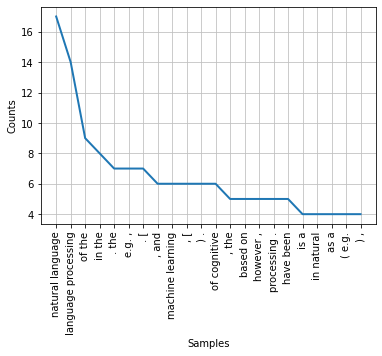

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
# 2.2 (4 points) Write the code for text summarization with any N-grams. Note that we
# will check your program using at least two different n-grams, e.g., n=2, 3, or 4.
# Hints:
# a) (0.5 points) use NLTK to get N-grams and FreqDist() to calculate the n-gram frequencies.
bigrams = generate_ngrams(mytext, 2)
fdis2 = nltk.FreqDist(bigrams)
print(fdis2)

#Print the dictionary base on the key values in reverse order.
print(list(sorted(fdis2.items(),key = lambda x: x[1],reverse=True))[0:22]) 

fdis2.plot(22)

# from itertools import islice
# def take(n, iterable):
#     "Return first n items of the iterable as a list"
#     return list(islice(iterable, n))
# n_items = take(22, fdis2.items())
# print("List of first 22 BIGRAMS: \n", n_items)



<FreqDist with 1434 samples and 1517 outcomes>
[('natural language processing', 12), ('language processing .', 5), ('in natural language', 4), ('( e.g. ,', 4), ('of natural language', 3), (', however ,', 3), ('] in the', 3), (', e.g. ,', 3), ('grammar , [', 3), ('language processing (', 2), ('processing ( nlp', 2), ('( nlp )', 2), ('of linguistics ,', 2), ('data . the', 2), ('of documents ,', 2), ('natural language .', 2), ('of symbolic nlp', 2), ('hand-written rules .', 2), ('in the late', 2), ('the late 1980s', 2), ('of machine learning', 2), ('machine learning algorithms', 2)]


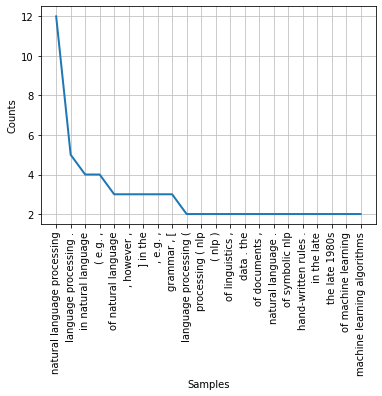

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
trigrams = generate_ngrams(mytext, 3)
fdis3 = nltk.FreqDist(trigrams)
print(fdis3)
#Print the dictionary base on the key values.
print(list(sorted(fdis3.items(),key = lambda x: x[1],reverse=True))[0:22])

fdis3.plot(22)

<FreqDist with 1485 samples and 1516 outcomes>
[('in natural language processing', 4), ('natural language processing .', 3), ('natural language processing (', 2), ('language processing ( nlp', 2), ('processing ( nlp )', 2), ('of natural language .', 2), ('in the late 1980s', 2), ('the input data .', 2), (', research has focused', 2), ('research has focused on', 2), ('has focused on statistical', 2), ('focused on statistical models', 2), ('on statistical models ,', 2), ('statistical models , which', 2), ('models , which make', 2), (', which make soft', 2), ('which make soft ,', 2), ('make soft , probabilistic', 2), ('soft , probabilistic decisions', 2), (', probabilistic decisions based', 2), ('probabilistic decisions based on', 2), ('decisions based on attaching', 2)]


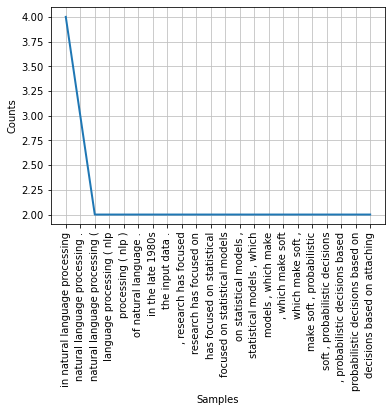

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
_4grams = generate_ngrams(mytext, 4)
fdis4 = nltk.FreqDist(_4grams)
print(fdis4)

#Print the dictionary base on the key values.
print(list(sorted(fdis4.items(),key = lambda x: x[1],reverse=True))[0:22])
fdis4.plot(22)

In [19]:
# b) (1.0 points) Find weighted frequency occurrences from FreqDist. You can use the similar
# function from Task 1. The code snippets and running outputs may be similar to:
def find_weighted_frequency(dict):
    frequency = nltk.FreqDist(dict)
    max_frequency = max(frequency.values())
    for word in frequency.keys():
        frequency[word] = frequency[word]/max_frequency
    return frequency
ngram_freqs = find_weighted_frequency(fdis3)
list(ngram_freqs.items())[0:20]

[('natural language processing', 1.0),
 ('language processing (', 0.16666666666666666),
 ('processing ( nlp', 0.16666666666666666),
 ('( nlp )', 0.16666666666666666),
 ('nlp ) is', 0.08333333333333333),
 (') is a', 0.08333333333333333),
 ('is a subfield', 0.08333333333333333),
 ('a subfield of', 0.08333333333333333),
 ('subfield of linguistics', 0.08333333333333333),
 ('of linguistics ,', 0.16666666666666666),
 ('linguistics , computer', 0.08333333333333333),
 (', computer science', 0.08333333333333333),
 ('computer science ,', 0.08333333333333333),
 ('science , and', 0.08333333333333333),
 (', and artificial', 0.08333333333333333),
 ('and artificial intelligence', 0.08333333333333333),
 ('artificial intelligence concerned', 0.08333333333333333),
 ('intelligence concerned with', 0.08333333333333333),
 ('concerned with the', 0.08333333333333333),
 ('with the interactions', 0.08333333333333333)]

In [20]:
'natural language processing' in ngram_freqs.keys()

True

In [22]:
%%time
# c) (1.5 points) Define the function like calculate_sentence_scores_ngram(sent_tokens,
# ngram_freqs, n_grams) to calculate the sentence scores for any N-grams. This function
# is similar to the one in Task 1.

def calculate_sentence_scores_ngram(sent_tokens, n_grams):
    sentences = nltk.sent_tokenize(sent_tokens)
    n_grams_dict = ngrams(nltk.word_tokenize(sent_tokens.lower()), n_grams)
    ngrams_joint = [' '.join(grams) for grams in n_grams_dict]
    #print(ngrams_joint)
   
    frequency = nltk.FreqDist(ngrams_joint)
    #print(frequency.items())
    max_frequency = max(frequency.values())
    #print('Max n_grams frequency in the whole text: ', max_frequency)

    for word in frequency.keys():
        frequency[word] = frequency[word]/max_frequency
    
    sent_scores = {}
    for x in sentences:
        n_grams_dict1 = ngrams(nltk.word_tokenize(x.lower()), n_grams)
        ngrams_joint1 = [' '.join(grams) for grams in n_grams_dict1]
        frequency1 = nltk.FreqDist(ngrams_joint1)
        for gram in frequency1.keys():
            if x not in sent_scores.keys():
                sent_scores[x] = frequency[gram]
            else:
                sent_scores[x] += frequency[gram]
                #print(sent_scores)
    return sent_scores

print('THE SENTENCE SCORES BY FOR N-grams = 3.  I used 2 n-grams frequencies, 1 for the whole text, 1 for each sentence.\n')

sent_score_ngram = calculate_sentence_scores_ngram(mytext,3)
print(sorted(sent_score_ngram.items(), key=lambda item: item[1], reverse=True)[0:10])

THE SENTENCE SCORES BY FOR N-grams = 3.  I used 2 n-grams frequencies, 1 for the whole text, 1 for each sentence.

Max n_grams frequency in the whole text:  12
[('More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: \nDespite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:\nSince the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.', 6.916666666666666), ('As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[42] with two defining aspects:\nTies with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s.', 6.833333333333327), ('Neverth

In [32]:
# d) (1.0 points) Getting the summary is the same as Task 1. The following running output
# examples show the summarized text using tri-grams and 3 sentences (based on
# sentence count, word count, and percentage).

sorted_summary_list = (sorted(sent_score_ngram.items(), key=lambda item: item[1], reverse=True))
sorted_summary_dict = dict(sorted_summary_dict)
print(sorted_summary_dict)


{'More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: \nDespite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:\nSince the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.': 6.916666666666666, 'As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[42] with two defining aspects:\nTies with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s.': 6.833333333333327, 'Nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cogni

In [34]:
#a) Getting the Summary for Top 3 sentences.
import heapq
from collections import defaultdict
from string import punctuation
from heapq import nlargest

ngrams_summary = heapq.nlargest(3, sorted_summary_dict, key=sorted_summary_dict.get)
trigram_summary = ' '.join(ngrams_summary)
print(trigram_summary)

print("\n -----------------")
print(" -----------------")
print(" I RETRIEVED TOP 3 SENTENCES WITH THE HIGHEST SCORES BASED ON TRIGRAMS SENTENCING SCORES RANKING.")

More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: 
Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used:
Since the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. As an example, George Lakoff offers a methodology to build natural language processing (NLP) algorithms through the perspective of cognitive science, along with the findings of cognitive linguistics,[42] with two defining aspects:
Ties with cognitive linguistics are part of the historical heritage of NLP, but they have been less frequently addressed since the statistical turn during the 1990s. Nevertheless, approaches to develop cognitive models towards technically operationalizable frameworks have been pursued in the context of various frameworks, e.g., of cognitive grammar,[44] functional grammar,[45] constru

In [36]:
# b) Summary for WORD COUNT with trigram ranking:
trigram_summary_word = ""
tokenized_summary = word_tokenize(trigram_summary)
for w in tokenized_summary: #and w not in stopwords.words('english'):
    if len(trigram_summary_word.split()) < 100:
        trigram_summary_word += " "+ w
print('**** THE FIRST 100 WORDS SUMMARY USING TRI-GRAMS RANKING SENTENCES (keeping stopwords and special characters)')
trigram_summary_word

**** THE FIRST 100 WORDS SUMMARY USING TRIGRAMS RANKING SENTENCES (keeping stopwords and special characters)


" More recent systems based on machine-learning algorithms have many advantages over hand-produced rules : Despite the popularity of machine learning in NLP research , symbolic methods are still ( 2020 ) commonly used : Since the so-called `` statistical revolution '' [ 15 ] [ 16 ] in the late 1980s and mid-1990s , much natural language processing research has relied heavily on machine learning . As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics , ["

In [71]:
# c)  Summary for PERCENTAGE (10%) using tri-grams
len(sent_tokenize(mytext))
#get all the sentences from the tri-grams dictionary.
total_summary_sentences = heapq.nlargest(50, sorted_summary_dict, key=sorted_summary_dict.get)
full_trigrams_summary = ''.join(total_summary_sentences)

trigrams_summary_pct = ""
tokenized_summary1 = word_tokenize(full_trigrams_summary)
for w in tokenized_summary1: 
    if len(trigrams_summary_pct.split()) < len(full_trigrams_summary.split())/10:
        trigrams_summary_pct += " "+ w

print('Number of words in the summary by percentage (10%) is: ', len(trigrams_summary_pct.split()))
print('Number of total words from the Website text is: ', len(full_trigrams_summary.split()))
print('\n****THE FIRST 10% OF ALL THE WORDS FROM THE TRI-GRAMS RANKED SENTENCES:')
trigrams_summary_pct

Number of words in the summary by percentage (10%) is:  122
Number of total words from the Website text is:  1218

****THE FIRST 10% OF ALL THE WORDS FROM THE TOP RANKED SENTENCES:


" More recent systems based on machine-learning algorithms have many advantages over hand-produced rules : Despite the popularity of machine learning in NLP research , symbolic methods are still ( 2020 ) commonly used : Since the so-called `` statistical revolution '' [ 15 ] [ 16 ] in the late 1980s and mid-1990s , much natural language processing research has relied heavily on machine learning.As an example , George Lakoff offers a methodology to build natural language processing ( NLP ) algorithms through the perspective of cognitive science , along with the findings of cognitive linguistics , [ 42 ] with two defining aspects : Ties with cognitive linguistics are part of the historical heritage of NLP , but they have been"

### 1 (0.5 points)  Compare these two methods for text summarization. What are different and why? Please clearly explain (around 100 words).
"The methods of summarization for the tri-gram method and the regular word and sentence tokenizing method are mildly different.  In a way, the word tokenizing summary method is similar with the 1-gram method because 1-gram takes in 1 word which is similar with being tokenized.  The results of the summary are also different due to the way the sentences being scored and ranked.  In the word tokenized method, the sentences are ranked by the total sum of each token score in a sentence.  In the tri-gram, each sentence is ranked by the tri-grams (3 words) scores."  

In [76]:
txt = "The methods of summarization for the tri-gram method and the regular word and sentence tokenizing method are mildly different.  In a way, the word tokenizing summary method is similar with the 1-gram method because 1-gram takes in 1 word which is similar with being tokenized.  The results of the summary are also different due to the way the sentences being scored and ranked.  In the word tokenized method, the sentences are ranked by the total sum of each token score in a sentence.  In the tri-gram, each sentence is ranked by the tri-grams (3 words) scores."
len(word_tokenize(txt))


106

### 2 (0.5 points) List references to appreciate other’s work in a professional manner.

REFERENCES:

Malik, U. (2018). Text Summarization with NLTK in Python. Stack Abuse. Retrieved from https://stackabuse.com/text-summarization-with-nltk-in-python/

Panchal, A. (2019). NLP - Text Summarization using NLTK: TF-IDF Algorithm. Retrieved from https://towardsdatascience.com/text-summarization-using-tf-idf-e64a0644ace3

Robinson, A. (2020). Term Frequency Text Summarization. Retrieved from https://medium.com/analytics-vidhya/term-frequency-text-summarization-cc4e6381254c



In [ ]:
# 3 You are strongly suggested to follow Python coding convention to write the code. The
# program should be robust and will be tested with several different text files for grading.